# Harris Corner Detection

**Equation**

<img src = 'harris.jpg'>

Where,
u = window's displacement in the x-direction

v = window's displacement in the y-direction

w(x,y) = postion of the window

I (x+u,y+v) = Intensity of the window

I (x,y) = Intensity of the regular image


However since this equation is invlolves too complex calculation,an approximation of this equation is build in the Harris corner detection using the Taylor series.

Now we arrive to a simpler matrix form of the equation.

**Matrix Form**

<img src = 'matrix.png'>

This matrix is a Eigen vector and λ1 and λ2 are the Eigen values of the equation.
R score is computed as follows:

R score = det(matrix) - K(trace matric)**2

det(matrix)  = λ1.λ2

trace(matrix) = λ1+λ2

If R ≈ 0 then the window  is in a **flat surface**

If R<<0 then the window is in an **edge**

If R>>0 then the window is in a **Corner**




In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
img = cv2.imread('shapes.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

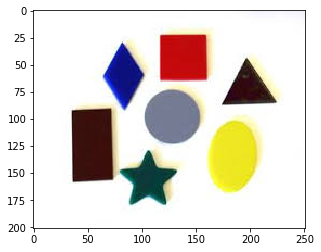

In [52]:
plt.imshow(img)

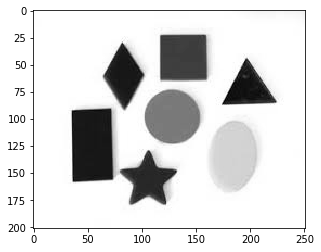

In [53]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray_img = np.float32(gray_img)
plt.imshow(gray_img,cmap = 'gray')

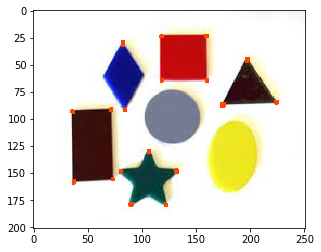

In [55]:
# Convert Gray Scale Image to Float Values
gray_img = np.float32(gray_img)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray_img,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255,69,0]

plt.imshow(img)